<center><h1>Bag of n_grams</center>

<b>Fake News Classification

- Fake
- Real

In [1]:
import pandas as pd


#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [3]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


<b>Modelling without Pre-processing Text data

In [4]:
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (7920,)
Shape of X_test:  (1980,)


<b>Attempt 1 :</b>

- using sklearn pipeline module create a classification pipeline to classify the Data.
  
<br><b>Note:</b>

- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 3))),                   #using the ngram_range parameter 
     ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))           #using the KNN classifier with 10 neighbors and euclidean distance      
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.49      0.65      1000
           1       0.65      0.98      0.78       980

    accuracy                           0.73      1980
   macro avg       0.81      0.74      0.72      1980
weighted avg       0.81      0.73      0.72      1980



In [7]:
fake_text = '''
 It’s becoming clear that even Trump’s strongest allies are starting to distance themselves. If things weren’t bad enough, his closest surrogate, Rudy Giuliani, went on live TV and called Trump a "disgrace" to the Republican Party. Giuliani, who has stood by Trump for years, seems to have reached his breaking point after Trump’s recent controversies.

Giuliani, typically a staunch defender of the former president, claimed on Fox News, “Look, I’ve been with Trump through thick and thin, but the way he’s handling this situation? It’s pathetic. He’s obsessed with petty slights when he should be focused on beating Joe Biden. Instead, he’s letting his ego run the show.”

The breaking point came when Trump lashed out at Senate Republicans, accusing them of disloyalty. Giuliani added, "Trump’s biggest problem is himself. He’s too focused on personal grudges, and that’s what’s going to cost him. The real fight is with Biden, not his own party."

Giuliani continued, "If Trump doesn’t get his act together, he’ll find himself alone in the political wilderness. No one will be there to save him.”
 '''

In [8]:
real_text = '''
Dhaka, March 8 – Bangladesh is set to host a tri-nation T20 series featuring Sri Lanka and Afghanistan as part of their preparations for the ICC T20 World Cup 2024. The Bangladesh Cricket Board (BCB) confirmed that the series will take place in May, providing crucial match practice before the global tournament. Captain Shakib Al Hasan expressed confidence in the team’s readiness, stating that these matches will help fine-tune their strategy for the World Cup.
'''

In [9]:
clf.predict([fake_text])

array([1], dtype=int64)

1 means real news and it's wrong prediction

In [10]:
clf.predict([real_text])

array([1], dtype=int64)

1 means real news and it's correct prediction

<b>Attempt 2 :</b>

- using the sklearn pipeline module create a classification pipeline to classify the Data.
  
<br><b>Note:</b>

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [11]:
from sklearn.ensemble import RandomForestClassifier


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (3, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1000
           1       0.98      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [14]:
clf.predict([fake_text])

array([0], dtype=int64)

O means fake news and it's correct prediction

In [15]:
clf.predict([real_text])

array([1], dtype=int64)

1 means real news and it's correct prediction

<b>Attempt 3 :</b>

- using the sklearn pipeline module create a classification pipeline to classify the Data.
  
<br><b>Note:</b>

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier with an alpha value of 0.75.
- print the classification report.

In [17]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_trigrams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB(alpha = 0.75))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



In [18]:
clf.predict([fake_text])

array([0], dtype=int64)

O means fake news and it's correct prediction

In [19]:
clf.predict([real_text])

array([1], dtype=int64)

1 means real news and it's correct prediction

<b>Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [20]:
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [21]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [22]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump surrogate BRUTALLY Stabs Pathetic VIDE...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

<b> Random Forest is the best model till now

<b>Attempt 2 :</b>

- using the sklearn pipeline module create a classification pipeline to classify the Data.
  
<br><b>Note:</b>

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [25]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



Text(95.72222222222221, 0.5, 'Truth')

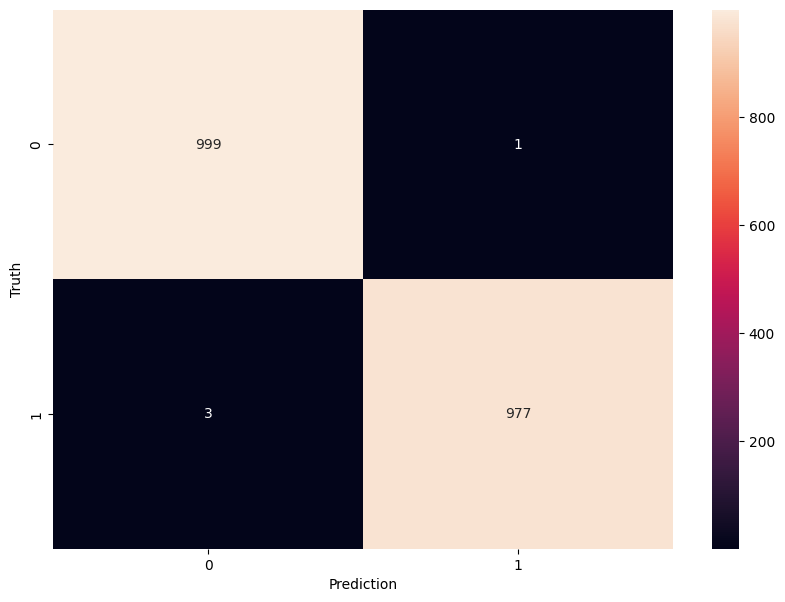

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [27]:
clf.predict([fake_text])

array([0], dtype=int64)

O means fake news and it's correct prediction

In [28]:
clf.predict([real_text])

array([1], dtype=int64)

1 means real news and it's correct prediction